background info

Original paper and data are from Edgar Anderson (1936).  The first analysis of the dataset was in 1936 by Ronald Fisher.  Notice that this well know dataset was first statistically analyzed in the journal Annals of Eugenics. 

References

Anderson, E. (1936). The species problem in Iris. Annals of the Missouri Botanical Garden, 23(3), 457-509.

Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. Annals of eugenics, 7(2), 179-188.

Online Access to these journal articles

https://ia802305.us.archive.org/1/items/biostor-11559/biostor-11559.pdf

https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x

In [51]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi



# Load the data
df = sns.load_dataset('iris')

# Display the first 5 rows
print(df.head())
print('This work was done by Philip!')


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
This work was done by Philip!


After loading the data in the dataframe (df) we see that we have five columns.  Each row is a different flower that was measured.  

In [52]:
# Initial data analysis
rows, col = df.shape
print("Rows : %s, column : %s" % (rows, col))
print(df.info())
print(df.isnull().sum())

Rows : 150, column : 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


We get a lot of information from the shape and info functions.  There are 150 rows and 5 columns.  But we already know about the columns from earlier.  We also see that there are no nonnull values.  Lastly, we also see that the four measurement columns are all floats.  Species is an object.  In a moment we'll see what the values are for species and how many we have.

In [53]:
# Adding a new column
df['sepal Area'] = df['sepal_length'] * df['sepal_width']

# Initial data statistics
# print(df.groupby('species').median()) #I decided that this wasn't necessary
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width  sepal Area
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333   17.822867
std        0.828066     0.435866      1.765298     0.762238    3.361854
min        4.300000     2.000000      1.000000     0.100000   10.000000
25%        5.100000     2.800000      1.600000     0.300000   15.660000
50%        5.800000     3.000000      4.350000     1.300000   17.660000
75%        6.400000     3.300000      5.100000     1.800000   20.325000
max        7.900000     4.400000      6.900000     2.500000   30.020000


The describe function tells us about the mean, median, quartiles, as well as the minimum and maximum values.  Mean and median are both measure of central tendency.  If they are different, then we might want to look carefully at how the data is distributed.  Notice that median and mean values for petal length and width are more different from one another than sepal length and width.  Let's make some histograms to look at this some more.

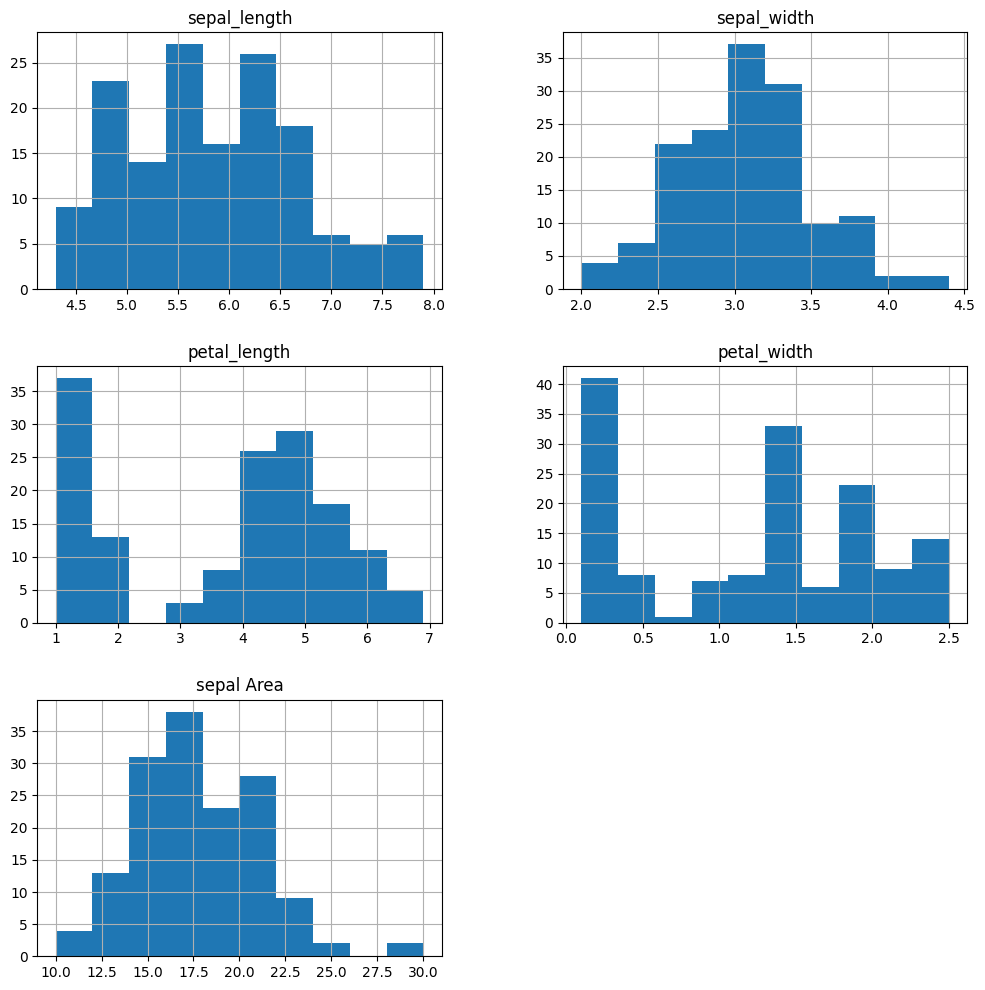

In [76]:
# Inspect histogram by numerical column
#df['sepal_length'].hist()

# Inspect histograms for all numerical columns
df.hist(figsize=(12, 12))

# Show all plots
plt.show()

We already noticed that there was something going on with the petal length and petal width variables.  Now we can see from the histograms for these two variables that there is something unique about how the data are distributed.  Lets move on to looking at information by the three categories of species.

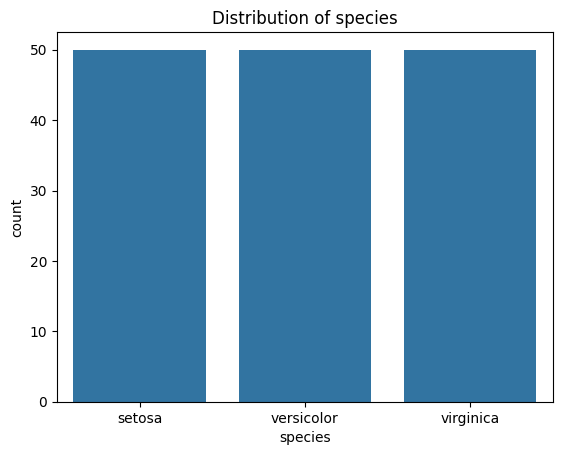

In [55]:
# Inspect value counts by categorical column
df['species'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

What we see here is that there are 50 examples of each of three different species. Now we are getting a sense of what data we have. But let's summarize anyways.  We have 150 rows and 5 columns.  Four of the columns are numeric and one is categorical.  The categorical column is the species and the other four are measurements of petal and sepal length and width.  We also know that there are three different species in equal numbers of 50 each.

It would be interesting to know how the data is distributed for each species.

<Axes: xlabel='species', ylabel='sepal_width'>

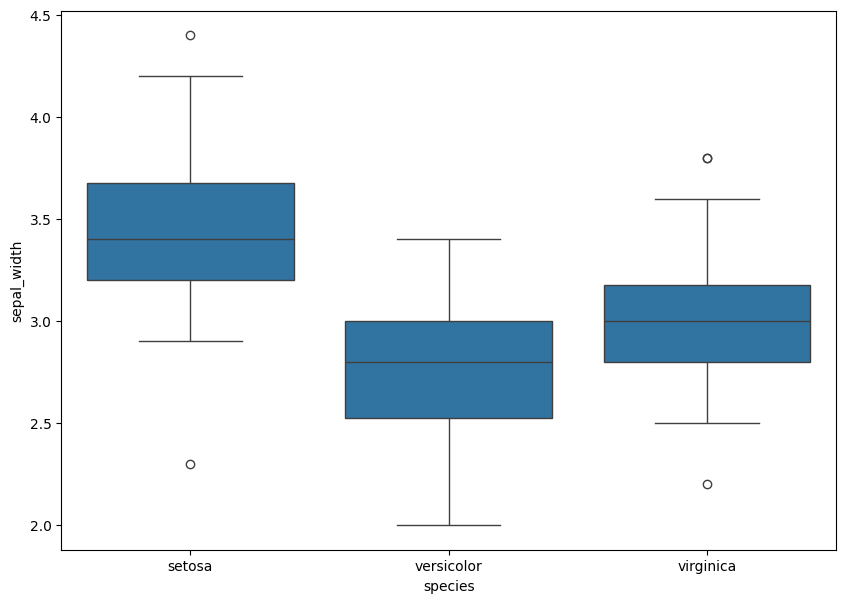

In [56]:
plt.figure(figsize=(10,7))
sns.boxplot(x='species',y='sepal_width',data=df)

This box plot shows us sepal width for the three different species.  We can see that there's a larger range for setosa than the other two species.  However, there's lots of other columns and statistics to look at, so let's switch to tables.

In [57]:
agg_dict={field: ['mean', 'median'] for  field in df.columns.tolist() if field != 'species'}
df.groupby('species').agg(agg_dict)

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.428    3.4        1.462   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width        sepal Area          
                  mean median       mean  median  
species                                           
setosa           0.246    0.2    17.2578  17.170  
versicolor       1.326    1.3    16.5262  16.385  
virginica        2.026    2.0    19.6846  20.060

In [58]:
agg_dict={field: ['min', 'max'] for  field in df.columns.tolist() if field != 'species'}
df.groupby('species').agg(agg_dict)

sepal_length      sepal_width      petal_length      petal_width  \
                    min  max         min  max          min  max         min   
species                                                                       
setosa              4.3  5.8         2.3  4.4          1.0  1.9         0.1   
versicolor          4.9  7.0         2.0  3.4          3.0  5.1         1.0   
virginica           4.9  7.9         2.2  3.8          4.5  6.9         1.4   

                sepal Area         
            max        min    max  
species                            
setosa      0.6      10.35  25.08  
versicolor  1.8      10.00  22.40  
virginica   2.5      12.25  30.02

In [59]:
agg_dict={field: ['std', 'var'] for  field in df.columns.tolist() if field != 'species'}
df.groupby('species').agg(agg_dict)

sepal_length           sepal_width           petal_length  \
                    std       var         std       var          std   
species                                                                
setosa         0.352490  0.124249    0.379064  0.143690     0.173664   
versicolor     0.516171  0.266433    0.313798  0.098469     0.469911   
virginica      0.635880  0.404343    0.322497  0.104004     0.551895   

                     petal_width           sepal Area             
                 var         std       var        std        var  
species                                                           
setosa      0.030159    0.105386  0.011106   2.933775   8.607034  
versicolor  0.220816    0.197753  0.039106   2.866882   8.219012  
virginica   0.304588    0.274650  0.075433   3.458783  11.963180

Looking at the box plot and the underlying tables, we can see the differences in the three species.  notice that petal length and petal width differentiate setosa from the other two species.  However, the sepal length, width, and area overlap betwen all three species.  A posible useful observation here is that petal variables are more definitive for species.  

Our next step is to look at how the different variables relate to one another.  Let's take a look at a pair plot to get an overview and then decide which combinations we want to zoom in on.

In [60]:
# Renaming a column
#df.rename(columns={'sepal_length': 'Sepal Length'}, inplace=True)
# This was in the specification but it is not necessary and caused me frustration later on so I commented it out



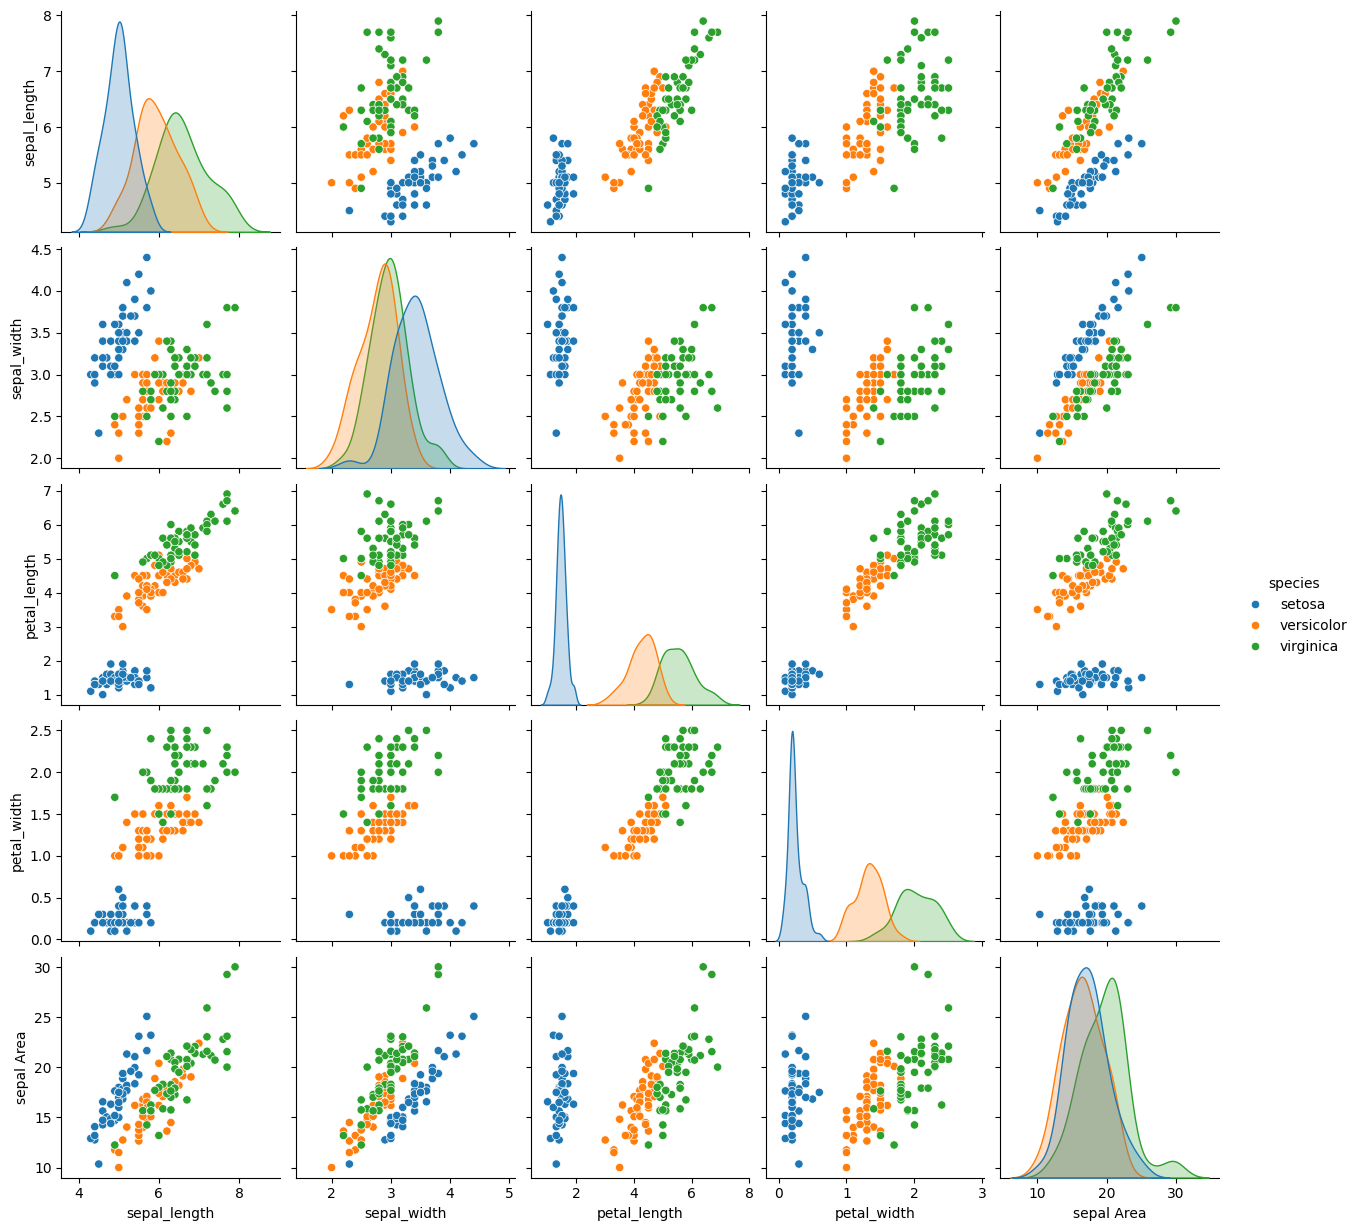

In [61]:
sns.pairplot(df, hue='species')
plt.show()

The first thing that we see is that the blue points for the setosa species cluster away from the green and orange points for versicolor and virginica species.  Another thing to notice is that the clusters of sepal width for setosa are not as compact as the other variables.

Let's create a larger scatterplot to see this more clearly.

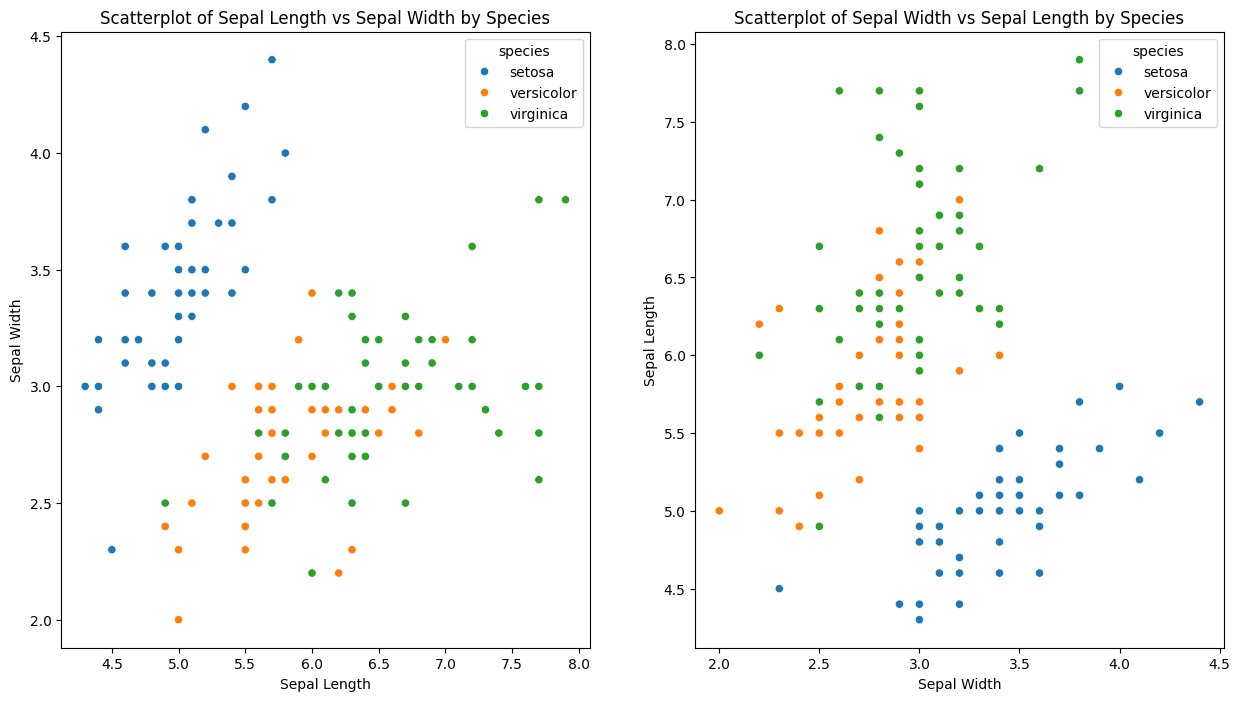

In [79]:
# Create scatterplot
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')

# Add labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatterplot of Sepal Length vs Sepal Width by Species')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='sepal_width', y='sepal_length', hue='species')

# Add labels and title
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.title('Scatterplot of Sepal Width vs Sepal Length by Species')

# Display the plot
plt.show()

These two plots are actually the same plot with just their x and y axes switched.  We noticed earlier that sepal width in setosa was less clustered than the other two species.  This can be seen most clearly in the scatterplot on the right.  It's on the scatterplot on the left too; but you have to turn your head sideways which can be frustrating.

We can make the same scatterplots for petal length and width too.

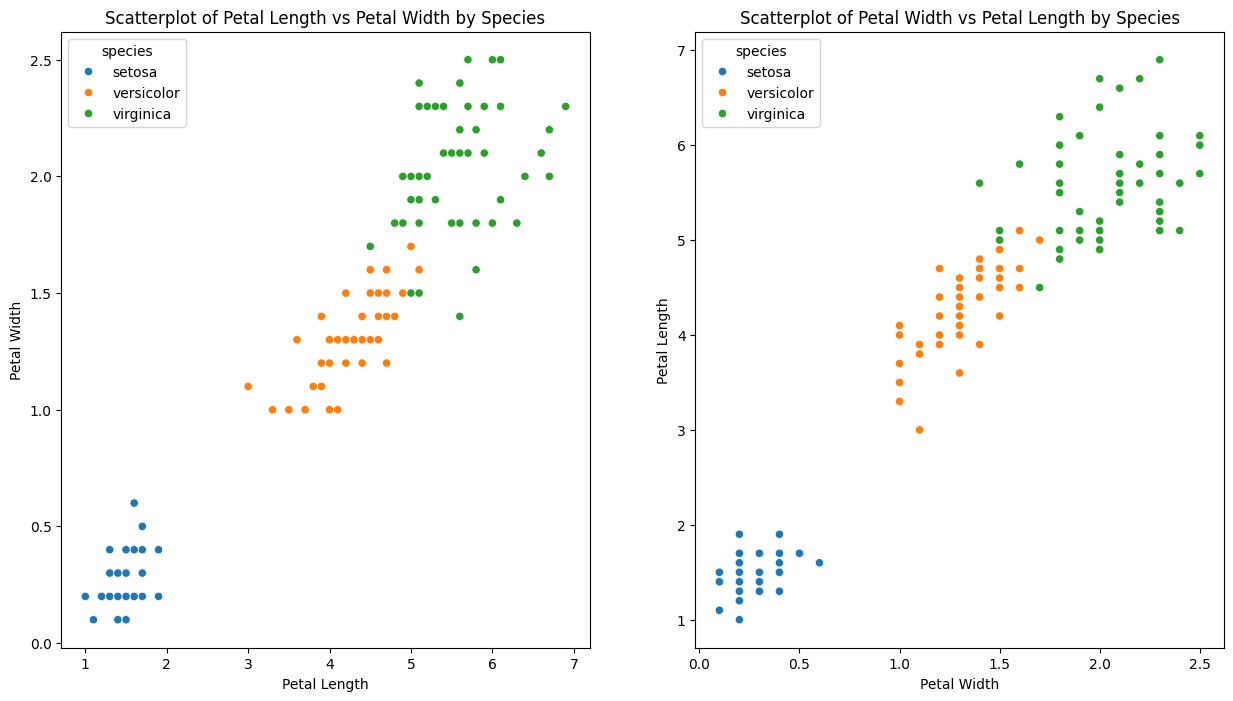

In [80]:
# Create scatterplot
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

# Add labels and title
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatterplot of Petal Length vs Petal Width by Species')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='petal_width', y='petal_length', hue='species')

# Add labels and title
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Scatterplot of Petal Width vs Petal Length by Species')

# Display the plot
plt.show()

The first thiing to notice is the positive relationship between length and width.  We're going to want to see a correlation between these two values next!  But first let's see what else we can glean from the scatterplots.

Setosa is certainly the smallest of the three. Versicolor and virginica are closer in size.  Virginica does tend to be larger than versicolor though.  Also notice that there is a bit of overlap between virginica and versicolor.

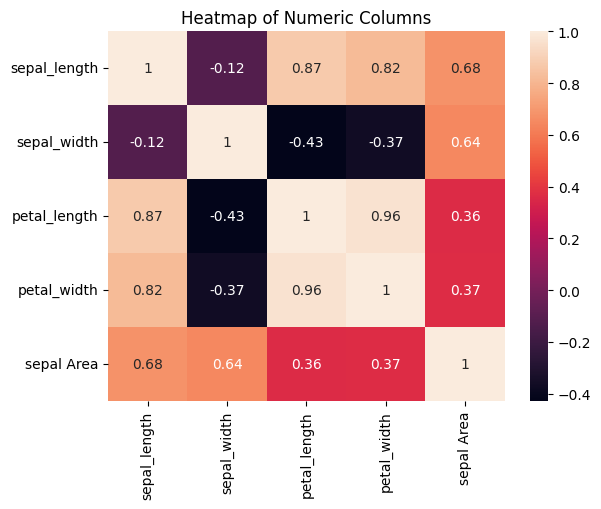

In [64]:
# Let's create a heatmap of the correlation matrix
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Heatmap of Numeric Columns')
plt.show()



Petal variables of length and width have the strongest correlation.  Sepal length correlates strongly with both of the petal variables; however sepal width does not.  Sepal area may be useful; but I really want to know about the shape of the leaf.  Visuals are better here.

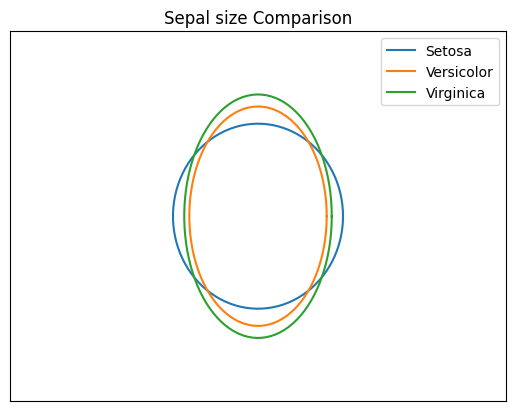

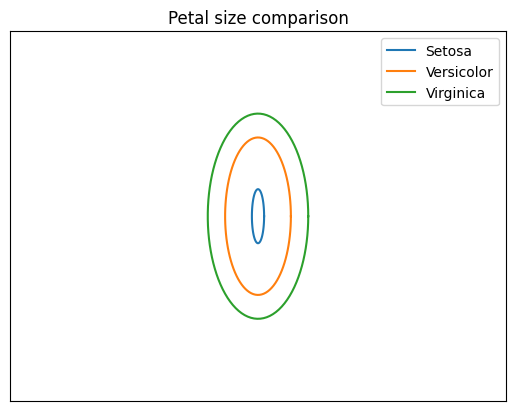

In [65]:
data_setosa = df.loc[df['species'] == 'setosa']
data_virginica = df.loc[df['species'] == 'virginica']
data_versicolor = df.loc[df['species'] == 'versicolor']

u=0     #x-position of the center
v=0   #y-position of the center
t = np.linspace(0, 2*pi, 100)

a=data_setosa['sepal_width'].mean()    #radius on the x-axis
b=data_setosa['sepal_length'].mean()     #radius on the y-axis

leaf_setosa = plt.plot( u+a*np.cos(t) , v+b*np.sin(t), label='Setosa'  ) 


a=data_versicolor['sepal_width'].mean()    #radius on the x-axis
b=data_versicolor['sepal_length'].mean()     #radius on the y-axis
leaf_versicolor = plt.plot( u+a*np.cos(t) , v+b*np.sin(t), label='Versicolor'  ) 

a=data_virginica['sepal_width'].mean()    #radius on the x-axis
b=data_virginica['sepal_length'].mean()     #radius on the y-axis
leaf_virginica = plt.plot( u+a*np.cos(t) , v+b*np.sin(t), label='Virginica'  ) 

plt.xticks([]) 
plt.yticks([]) 
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title('Sepal size Comparison')
plt.legend()
plt.show()

a=data_setosa['petal_width'].mean()    #radius on the x-axis
b=data_setosa['petal_length'].mean()     #radius on the y-axis
leaf_setosa = plt.plot( u+a*np.cos(t) , v+b*np.sin(t), label='Setosa'  ) 

a=data_versicolor['petal_width'].mean()    #radius on the x-axis
b=data_versicolor['petal_length'].mean()     #radius on the y-axis
leaf_versicolor = plt.plot( u+a*np.cos(t) , v+b*np.sin(t), label='Versicolor' ) 

a=data_virginica['petal_width'].mean()    #radius on the x-axis
b=data_virginica['petal_length'].mean()     #radius on the y-axis
leaf_virginica = plt.plot( u+a*np.cos(t) , v+b*np.sin(t), label='Virginica' ) 

plt.title('Petal size comparison')
plt.xticks([]) 
plt.yticks([]) 
plt.legend()
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

Notice that the shape of the Setosa Sepals are definitely different from versicolor and virginica.  Setosa is more round than versicolor and virginica.  Petal size in Setosa is also smaller than Versicolor and virginica.